# Review of Experimental Results for Mackey-Glass 17

In [28]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from scipy.interpolate import make_interp_spline

In [29]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('MG-experiment-' + str(df[0]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[0]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('MG-experiment-' + str(df[1]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[1]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('MG-experiment-' + str(df[2]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[2]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('MG-experiment-' + str(df[3]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[3]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('MG-experiment-' + str(df[4]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[4]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('MG-experiment-' + str(df[5]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[5]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('MG-experiment-' + str(df[6]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[6]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('MG-experiment-' + str(df[7]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[7]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('MG-experiment-' + str(df[8]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[8]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('MG-experiment-' + str(df[9]) + ".pkl").best_value,  joblib.load('MG-experiment-' + str(df[9]) + ".pkl").best_trial,  joblib.load('MG-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('MG-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('MG-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('MG-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('MG-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('MG-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('MG-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('MG-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('MG-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('MG-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('MG-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('MG-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('MG-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('MG-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('MG-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('MG-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('MG-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('MG-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('MG-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('MG-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('MG-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('MG-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('MG-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('MG-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('MG-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('MG-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('MG-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('MG-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('MG-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('MG-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('MG-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('MG-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('MG-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('MG-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('MG-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('MG-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('MG-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('MG-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('MG-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('MG-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('MG-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [30]:
studies = studies.sort_values(by=1)
studies = studies.reset_index(drop=True)
studies.head(20)

,0,1,2,3
0,study_247B,0.116097,"FrozenTrial(number=96, values=[0.1160973783446...","[FrozenTrial(number=96, values=[0.116097378344..."
1,study_847B,0.119415,"FrozenTrial(number=88, values=[0.1194149101922...","[FrozenTrial(number=88, values=[0.119414910192..."
2,study_8569,0.120603,"FrozenTrial(number=50, values=[0.1206028243553...","[FrozenTrial(number=50, values=[0.120602824355..."
3,study_247A,0.123642,"FrozenTrial(number=139, values=[0.123641801402...","[FrozenTrial(number=139, values=[0.12364180140..."
4,study_246B,0.124104,"FrozenTrial(number=71, values=[0.1241044552174...","[FrozenTrial(number=71, values=[0.124104455217..."
5,study_846B,0.128044,"FrozenTrial(number=69, values=[0.1280440833109...","[FrozenTrial(number=69, values=[0.128044083310..."
6,study_8469,0.137586,"FrozenTrial(number=58, values=[0.1375856663928...","[FrozenTrial(number=58, values=[0.137585666392..."
7,study_2579,0.139201,"FrozenTrial(number=117, values=[0.139201217660...","[FrozenTrial(number=117, values=[0.13920121766..."
8,study_857B,0.139926,"FrozenTrial(number=125, values=[0.139925778438...","[FrozenTrial(number=125, values=[0.13992577843..."
9,study_2569,0.142005,"FrozenTrial(number=142, values=[0.142004581810...","[FrozenTrial(number=142, values=[0.14200458181..."


## Confirm Trial Results
Make sure the above results can be duplicated

In [31]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        rmse = 100
        mae0 = 100
        r20 = 0
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        rmse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return rmse, mae0, r20

def mg17(length):
    # https://towardsdatascience.com/learn-ai-today-04-time-series-multi-step-forecasting-6eb48bbcc724
    alpha = 0.2
    beta = 10
    gamma = 0.1
    tau = 17
    
    y = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485,
     1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]

    for n in range(17,length+99):
        y.append(y[n] - gamma*y[n] + alpha*y[n-tau]/(1+y[n-tau]**beta))
    y = y[100:]
    
    return y[100:]

#### Generate Data

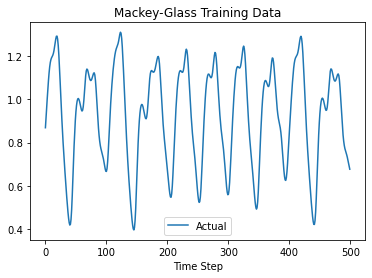

In [32]:
#Generate Data
trainsize = 2000
testsize = 2000

# generate train/test signals
y = (np.array(mg17(trainsize+testsize+100))).reshape(-1,1)
#Transform
transformedY = np.tanh(y-1)
trainin = transformedY[:trainsize,:]
testin = y[trainsize:,:]

z = np.arange(0, 500)
fig, ax = plt.subplots()
ax.plot(z, y[0:500,0], label='Actual')
ax.set(xlabel='Time Step',
       title='Mackey-Glass Training Data')
ax.legend()

#### Trial vs Recreated

In [33]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

    predicted = model.run(input_u=None, time=testin.shape[0])
    transformed = np.arctan(predicted) + 1

    rmse0, mae0, r20 = getScores(testin, transformed)
    print(studies.iloc[i,0])
    print("RMSE: " + str(studies.iloc[i,2].user_attrs['rmse']) + ", " + str(rmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_247B
RMSE: 0.11609737834460455, 0.11609737834460455
MAE: 0.07767714939539996, 0.07767714939539996
R2: 0.7624456126890172, 0.7624456126890172

study_847B
RMSE: 0.11941491019223151, 0.11941491019223151
MAE: 0.06552056488029658, 0.06552056488029658
R2: 0.7486752016672368, 0.7486752016672368

study_8569
RMSE: 0.12060282435531162, 0.12060282435531162
MAE: 0.06823117159862853, 0.06823117159862853
R2: 0.7436500795219091, 0.7436500795219091

study_247A
RMSE: 0.12364180140221688, 0.12364180140221688
MAE: 0.0696904884978176, 0.0696904884978176
R2: 0.7305681842984904, 0.7305681842984904

study_246B
RMSE: 0.12410445521749543, 0.12410445521749543
MAE: 0.07089981269496849, 0.07089981269496849
R2: 0.7285480442469983, 0.7285480442469983

study_846B
RMSE: 0.1280440833109955, 0.1280440833109955
MAE: 0.0825754531983031, 0.0825754531983031
R2: 0.7110403113983736, 0.7110403113983736

study_8469
RMSE: 0.13758566639286093, 0.13758566639286093
MAE: 0.08571536921153952, 0.08571536921153952
R2: 0.66637037

# Questions to Answer:
### How Does Model Accuracy Change as We Increase the Number of Neurons, N?
### Which reservoir activation function is the best?
### Is there an overwhelming difference in how the distribution type changes the model?
### Which connections within the reservoir give the best setup for this pattern generation task?
### None of the models which ranked well used a tanh output activation: discuss.
### Time complexity of different model instantiations

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [45]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
scores = np.zeros((15,2))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
for i in range(0,studies.shape[0]): #pick a model
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            scores[k,1] = r20
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        
        max_deviations = 2.5
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_nrmse = scores[not_outlier,0]
        no_outliers_r2 = scores[not_outlier,1]

        #average scores together
        nrmse0 = np.mean(no_outliers_nrmse)
        r20 = np.mean(no_outliers_r2)
        y[j,0] = nrmse0
        z[j,0] = r20
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)

/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:521: RuntimeWarning: underflow encountered in multiply
  x = (1 - self.a) * x + secondTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (1)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad genera

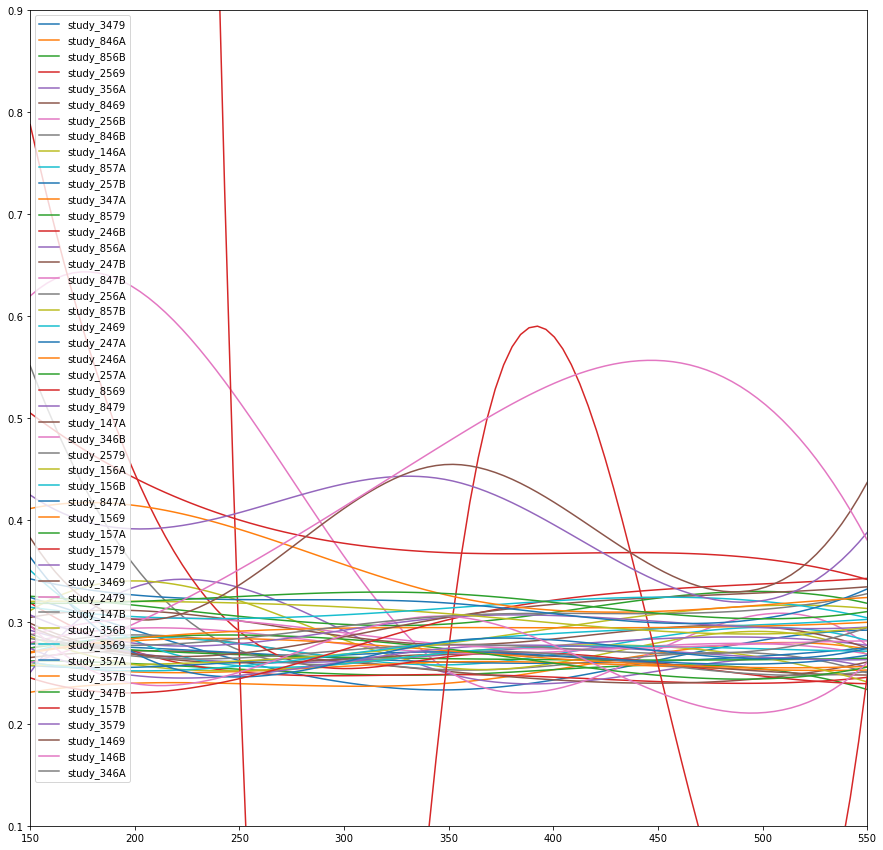

In [118]:
#add to plot
x = np.arange(50,551,inc) #Number of Neurons
plt.figure(figsize=(15, 15))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo3.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend()
plt.xlim([150,550])
plt.ylim([0.1,0.9])
plt.show()

In [47]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

,study_247B,study_847B,study_8569,study_247A,study_246B,study_846B,study_8469,study_2579,study_857B,study_2569,study_256B,study_2479,study_847A,study_256A,study_257A,study_856A,study_2469,study_856B,study_857A,study_246A,study_8579,study_8479,study_257B,study_147A,study_1569,study_3469,study_3479,study_357A,study_157A,study_156B,study_1579,study_146A,study_1479,study_3569,study_346A,study_347B,study_356B,study_3579,study_1469,study_346B,study_147B,study_146B,study_156A,study_357B,study_347A,study_846A,study_157B,study_356A
0,0.294689,0.403314,40.194244,0.287514,0.758408,40.166008,33.581193,0.533236,0.567909,0.647910,0.909722,0.489657,0.306578,0.806199,0.307297,40.188694,0.561331,60.168307,0.655524,0.634813,0.501666,0.485832,0.436420,0.290759,0.247983,20.222600,0.319251,0.408921,0.307505,0.278444,0.246881,0.276276,0.289433,0.306755,80.310564,0.325981,0.370602,0.406086,0.320522,0.280196,0.263098,0.244024,0.253420,0.306999,0.282149,0.243381,0.632234,0.245940
1,0.298719,0.279590,20.218063,0.257232,0.787892,0.274218,0.265092,0.288266,0.285972,0.318779,0.619839,0.296651,0.363604,0.551243,0.274367,0.291843,0.350663,0.261801,0.270065,0.269659,0.279687,0.274115,0.278454,0.304463,0.270545,0.295351,0.324021,0.342257,0.325202,0.260559,0.245147,0.311089,0.306859,0.314419,73.420188,0.318367,0.320156,0.424527,0.382661,0.287233,0.283687,0.259977,0.257379,0.411285,0.260371,0.231064,0.504997,0.250463
2,0.259930,0.290001,0.261939,0.260720,0.290738,0.279181,0.269066,0.264688,0.252157,0.250999,0.515981,0.250655,0.246019,0.272221,0.287140,0.260693,0.256978,0.253610,0.278479,0.283642,0.267939,0.247564,0.269760,0.301127,0.290981,0.269226,0.262167,0.321955,0.305509,0.256691,0.244369,0.320816,0.278734,0.303465,100.000000,0.324928,0.318541,0.407245,0.336331,0.300857,0.283709,0.351634,0.261677,0.390878,0.251422,0.239430,0.400033,0.333724
3,0.268458,0.269489,0.274214,0.270669,0.265991,0.253029,0.251424,0.277835,0.269796,0.248415,0.251685,0.305490,0.281128,0.269625,0.273302,0.268041,0.269876,0.248193,0.257927,0.271678,0.263938,0.274233,0.260578,0.277567,0.294466,0.304697,0.233339,0.318486,0.298036,0.280515,0.302271,0.255125,0.304597,0.313618,100.000000,0.327755,0.308013,0.439149,0.454569,0.277812,0.305880,0.477280,0.279269,0.325933,0.260745,0.239965,0.367918,0.249331
4,0.259287,0.276569,0.258199,0.260836,0.259871,0.267051,0.239948,0.269137,0.275963,0.241498,0.272716,0.231164,0.271659,0.258048,0.247681,0.283480,0.276053,0.257730,0.285235,0.258187,0.262587,0.271923,0.261490,0.293719,0.294488,0.324025,0.262566,0.299151,0.323404,0.293455,0.331605,0.279532,0.300581,0.324299,100.000000,0.308520,0.291110,0.339881,0.352192,0.274811,0.308215,0.556558,0.307719,0.310422,0.256730,0.269339,0.367832,0.251789
5,0.247934,0.268527,0.246677,0.267329,0.239414,0.249994,0.260651,0.294382,0.241124,0.245662,0.276871,0.260057,0.274030,0.251375,0.255707,0.277066,0.271340,0.233710,0.281849,0.256416,0.264379,0.262995,0.274669,0.274382,0.299655,0.334493,0.291971,0.332339,0.318289,0.302502,0.342756,0.268091,0.294957,0.304080,100.000000,0.310191,0.294601,0.387801,0.436839,0.281411,0.327707,0.380341,0.313176,0.323974,0.252838,0.273503,0.341625,0.255760


In [52]:
temp = pd.DataFrame.transpose(plotInfo3)
temp = temp.sort_values(by=5, ascending = True)
pd.DataFrame.transpose(temp)

,study_856B,study_246B,study_857B,study_2569,study_8569,study_247B,study_846B,study_256A,study_347A,study_257A,study_356A,study_246A,study_2479,study_8469,study_8479,study_8579,study_247A,study_146A,study_847B,study_2469,study_846A,study_847A,study_147A,study_257B,study_256B,study_856A,study_346B,study_857A,study_3479,study_2579,study_356B,study_1479,study_1569,study_156B,study_3569,study_347B,study_156A,study_157A,study_357B,study_147B,study_357A,study_3469,study_157B,study_1579,study_146B,study_3579,study_1469,study_346A
0,60.168307,0.758408,0.567909,0.647910,40.194244,0.294689,40.166008,0.806199,0.282149,0.307297,0.245940,0.634813,0.489657,33.581193,0.485832,0.501666,0.287514,0.276276,0.403314,0.561331,0.243381,0.306578,0.290759,0.436420,0.909722,40.188694,0.280196,0.655524,0.319251,0.533236,0.370602,0.289433,0.247983,0.278444,0.306755,0.325981,0.253420,0.307505,0.306999,0.263098,0.408921,20.222600,0.632234,0.246881,0.244024,0.406086,0.320522,80.310564
1,0.261801,0.787892,0.285972,0.318779,20.218063,0.298719,0.274218,0.551243,0.260371,0.274367,0.250463,0.269659,0.296651,0.265092,0.274115,0.279687,0.257232,0.311089,0.279590,0.350663,0.231064,0.363604,0.304463,0.278454,0.619839,0.291843,0.287233,0.270065,0.324021,0.288266,0.320156,0.306859,0.270545,0.260559,0.314419,0.318367,0.257379,0.325202,0.411285,0.283687,0.342257,0.295351,0.504997,0.245147,0.259977,0.424527,0.382661,73.420188
2,0.253610,0.290738,0.252157,0.250999,0.261939,0.259930,0.279181,0.272221,0.251422,0.287140,0.333724,0.283642,0.250655,0.269066,0.247564,0.267939,0.260720,0.320816,0.290001,0.256978,0.239430,0.246019,0.301127,0.269760,0.515981,0.260693,0.300857,0.278479,0.262167,0.264688,0.318541,0.278734,0.290981,0.256691,0.303465,0.324928,0.261677,0.305509,0.390878,0.283709,0.321955,0.269226,0.400033,0.244369,0.351634,0.407245,0.336331,100.000000
3,0.248193,0.265991,0.269796,0.248415,0.274214,0.268458,0.253029,0.269625,0.260745,0.273302,0.249331,0.271678,0.305490,0.251424,0.274233,0.263938,0.270669,0.255125,0.269489,0.269876,0.239965,0.281128,0.277567,0.260578,0.251685,0.268041,0.277812,0.257927,0.233339,0.277835,0.308013,0.304597,0.294466,0.280515,0.313618,0.327755,0.279269,0.298036,0.325933,0.305880,0.318486,0.304697,0.367918,0.302271,0.477280,0.439149,0.454569,100.000000
4,0.257730,0.259871,0.275963,0.241498,0.258199,0.259287,0.267051,0.258048,0.256730,0.247681,0.251789,0.258187,0.231164,0.239948,0.271923,0.262587,0.260836,0.279532,0.276569,0.276053,0.269339,0.271659,0.293719,0.261490,0.272716,0.283480,0.274811,0.285235,0.262566,0.269137,0.291110,0.300581,0.294488,0.293455,0.324299,0.308520,0.307719,0.323404,0.310422,0.308215,0.299151,0.324025,0.367832,0.331605,0.556558,0.339881,0.352192,100.000000
5,0.233710,0.239414,0.241124,0.245662,0.246677,0.247934,0.249994,0.251375,0.252838,0.255707,0.255760,0.256416,0.260057,0.260651,0.262995,0.264379,0.267329,0.268091,0.268527,0.271340,0.273503,0.274030,0.274382,0.274669,0.276871,0.277066,0.281411,0.281849,0.291971,0.294382,0.294601,0.294957,0.299655,0.302502,0.304080,0.310191,0.313176,0.318289,0.323974,0.327707,0.332339,0.334493,0.341625,0.342756,0.380341,0.387801,0.436839,100.000000


In [159]:
temp = pd.DataFrame.transpose(plotInfo3)
temp = temp.sort_values(by=0, ascending = True)
plotInfo3 = pd.DataFrame.transpose(temp)
plotInfo3

,study_846A,study_146B,study_356A,study_1579,study_1569,study_156A,study_147B,study_146A,study_156B,study_346B,study_347A,study_247A,study_1479,study_147A,study_247B,study_847A,study_3569,study_357B,study_257A,study_157A,study_3479,study_1469,study_347B,study_356B,study_847B,study_3579,study_357A,study_257B,study_8479,study_2479,study_8579,study_2579,study_2469,study_857B,study_157B,study_246A,study_2569,study_857A,study_246B,study_256A,study_256B,study_3469,study_8469,study_846B,study_856A,study_8569,study_856B,study_346A
0,0.243381,0.244024,0.245940,0.246881,0.247983,0.253420,0.263098,0.276276,0.278444,0.280196,0.282149,0.287514,0.289433,0.290759,0.294689,0.306578,0.306755,0.306999,0.307297,0.307505,0.319251,0.320522,0.325981,0.370602,0.403314,0.406086,0.408921,0.436420,0.485832,0.489657,0.501666,0.533236,0.561331,0.567909,0.632234,0.634813,0.647910,0.655524,0.758408,0.806199,0.909722,20.222600,33.581193,40.166008,40.188694,40.194244,60.168307,80.310564
1,0.231064,0.259977,0.250463,0.245147,0.270545,0.257379,0.283687,0.311089,0.260559,0.287233,0.260371,0.257232,0.306859,0.304463,0.298719,0.363604,0.314419,0.411285,0.274367,0.325202,0.324021,0.382661,0.318367,0.320156,0.279590,0.424527,0.342257,0.278454,0.274115,0.296651,0.279687,0.288266,0.350663,0.285972,0.504997,0.269659,0.318779,0.270065,0.787892,0.551243,0.619839,0.295351,0.265092,0.274218,0.291843,20.218063,0.261801,73.420188
2,0.239430,0.351634,0.333724,0.244369,0.290981,0.261677,0.283709,0.320816,0.256691,0.300857,0.251422,0.260720,0.278734,0.301127,0.259930,0.246019,0.303465,0.390878,0.287140,0.305509,0.262167,0.336331,0.324928,0.318541,0.290001,0.407245,0.321955,0.269760,0.247564,0.250655,0.267939,0.264688,0.256978,0.252157,0.400033,0.283642,0.250999,0.278479,0.290738,0.272221,0.515981,0.269226,0.269066,0.279181,0.260693,0.261939,0.253610,100.000000
3,0.239965,0.477280,0.249331,0.302271,0.294466,0.279269,0.305880,0.255125,0.280515,0.277812,0.260745,0.270669,0.304597,0.277567,0.268458,0.281128,0.313618,0.325933,0.273302,0.298036,0.233339,0.454569,0.327755,0.308013,0.269489,0.439149,0.318486,0.260578,0.274233,0.305490,0.263938,0.277835,0.269876,0.269796,0.367918,0.271678,0.248415,0.257927,0.265991,0.269625,0.251685,0.304697,0.251424,0.253029,0.268041,0.274214,0.248193,100.000000
4,0.269339,0.556558,0.251789,0.331605,0.294488,0.307719,0.308215,0.279532,0.293455,0.274811,0.256730,0.260836,0.300581,0.293719,0.259287,0.271659,0.324299,0.310422,0.247681,0.323404,0.262566,0.352192,0.308520,0.291110,0.276569,0.339881,0.299151,0.261490,0.271923,0.231164,0.262587,0.269137,0.276053,0.275963,0.367832,0.258187,0.241498,0.285235,0.259871,0.258048,0.272716,0.324025,0.239948,0.267051,0.283480,0.258199,0.257730,100.000000
5,0.273503,0.380341,0.255760,0.342756,0.299655,0.313176,0.327707,0.268091,0.302502,0.281411,0.252838,0.267329,0.294957,0.274382,0.247934,0.274030,0.304080,0.323974,0.255707,0.318289,0.291971,0.436839,0.310191,0.294601,0.268527,0.387801,0.332339,0.274669,0.262995,0.260057,0.264379,0.294382,0.271340,0.241124,0.341625,0.256416,0.245662,0.281849,0.239414,0.251375,0.276871,0.334493,0.260651,0.249994,0.277066,0.246677,0.233710,100.000000


In [87]:
plotInfo3_10 = plotInfo3.iloc[:,:10]

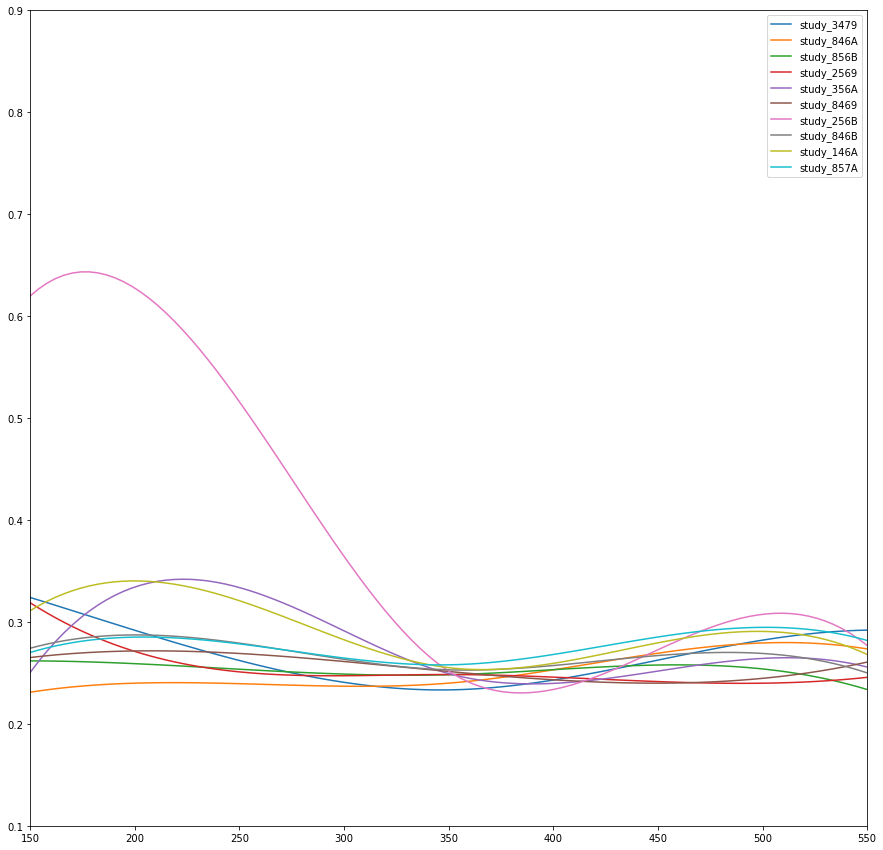

In [137]:
#add to plot
x = np.arange(50,551,inc) #Number of Neurons
plt.figure(figsize=(15, 15))
for col in range(0,plotInfo3_10.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo3_10.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3_10.columns[col])

plt.legend()
plt.xlim([150,550])
plt.ylim([0.1,0.9])
plt.show()

# Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [98]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo0 = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
    N = 50
    startState = np.zeros((1,N))
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)

/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


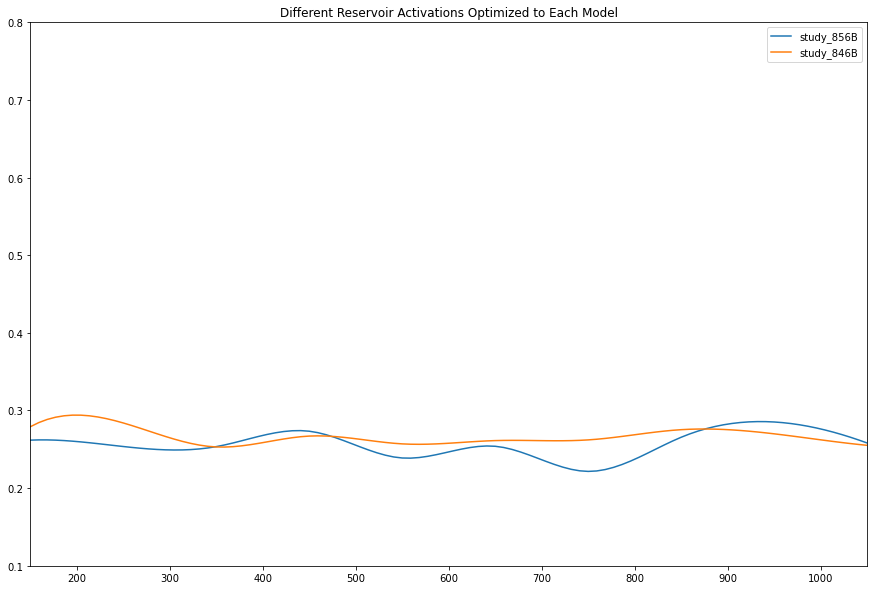

In [122]:
#add to plot
x = np.arange(50,1051,inc) #Number of Neurons
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo0.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo0.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.title('Different Reservoir Activations Optimized to Each Model')
plt.show()

## Same exact model with different activation function

In [123]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1


i = studies.loc[studies.iloc[:,0] == 'study_856B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


In [124]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_846B", "2": "study_856B"})

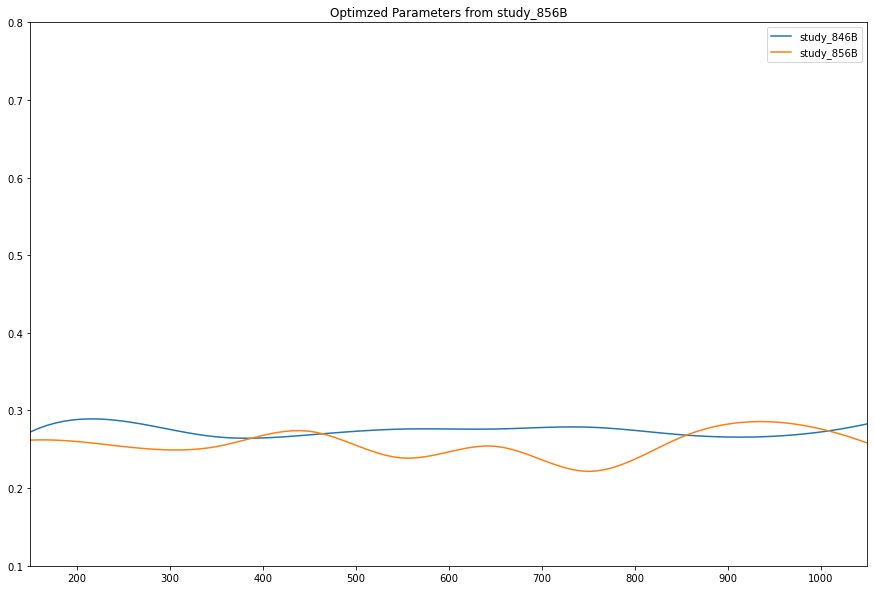

In [136]:
#add to plot
x = np.arange(50,1051,inc) #Number of Neurons
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo1.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo1.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.title('Optimzed Parameters from study_856B')
plt.show()

In [129]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/pyth

Exceptionally bad generation of ESN. Aborting sub-trial. (3)
Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


/Users/bweborg/Documents/Thesis/explore-esn/Mackey-Glass/ESN.py:520: RuntimeWarning: underflow encountered in multiply
  secondTerm = self.a * theTanTerm
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: underflow encountered in true_divide
  return sin(y)/y
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3315: RuntimeWarning: overflow encountered in multiply
  y = pi * where(x == 0, 1.0e-20, x)
/Users/bweborg/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3316: RuntimeWarning: invalid value encountered in sin
  return sin(y)/y


Exceptionally bad generation of ESN. Aborting sub-trial. (3)


In [130]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_846B", "2": "study_856B"})

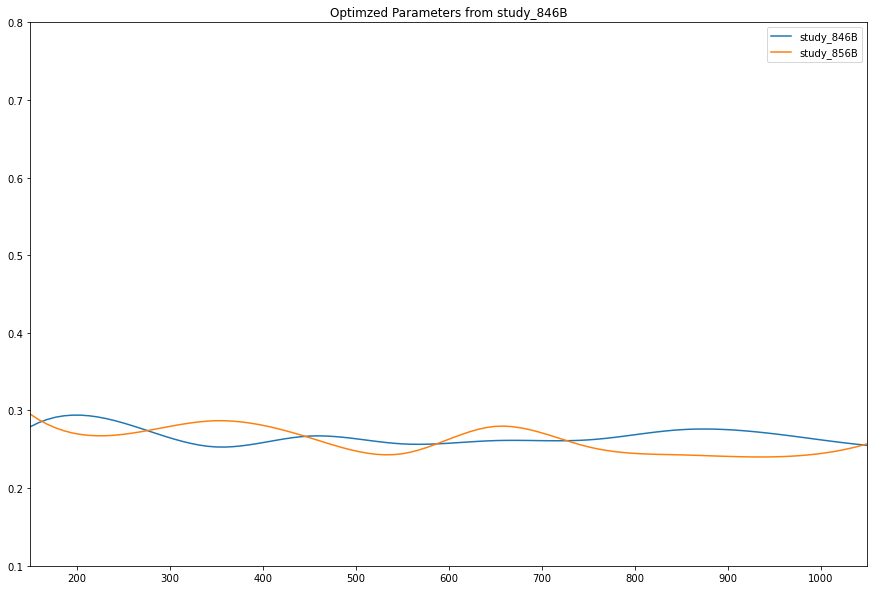

In [135]:
#add to plot
x = np.arange(50,1051,inc) #Number of Neurons
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo2.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo2.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.title('Optimzed Parameters from study_846B')
plt.show()

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [138]:
print(studies.loc[studies.iloc[:,0] == 'study_246A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_246A'].iloc[0,2].params

study_246A


{'p': 0.9438248116742267,
 'a': 0.41214361971079244,
 'dw': 0.12033804804373448,
 'dfb': 0.9186641013527107,
 'din': 0.18075340684555868,
 'sin': 0.5453575542361335,
 'sfb': 1.0561912615034672,
 'B': 1.8927088320609268e-06}

In [139]:
print(studies.loc[studies.iloc[:,0] == 'study_2469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_2469'].iloc[0,2].params

study_2469


{'p': 0.9958818134191998,
 'a': 0.4634807282743166,
 'dw': 0.22953199758773962,
 'dfb': 0.1491888440144452,
 'din': 0.12757302809811208,
 'sin': 0.9250031079073973,
 'sfb': 1.8329963737782606,
 'B': 4.131014424196568e-06}

In [140]:
print(studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,2].params

study_246B


{'p': 0.9170293562318912,
 'a': 0.3975779472084435,
 'dw': 0.30288033876745935,
 'dfb': 0.864372527090096,
 'din': 0.501185053552899,
 'sin': 1.1608812775758415,
 'sfb': 1.9308750260453031,
 'B': 9.617049437278911e-09}

#### Plotted each Model w/ Different Parameters/Distribution

In [143]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

while(count < 3): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [144]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_2469", "1": "study_246A", "2": "study_246B"})

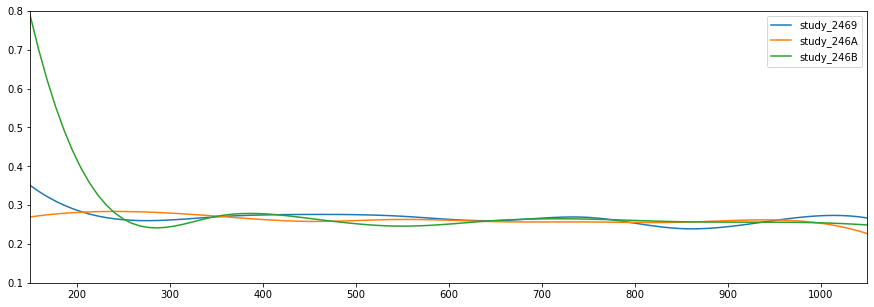

In [147]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo4.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo4.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_2469 optimized model

In [149]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

i = studies.loc[studies.iloc[:,0] == 'study_2469'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [150]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_2469", "1": "study_246A", "2": "study_246B"})

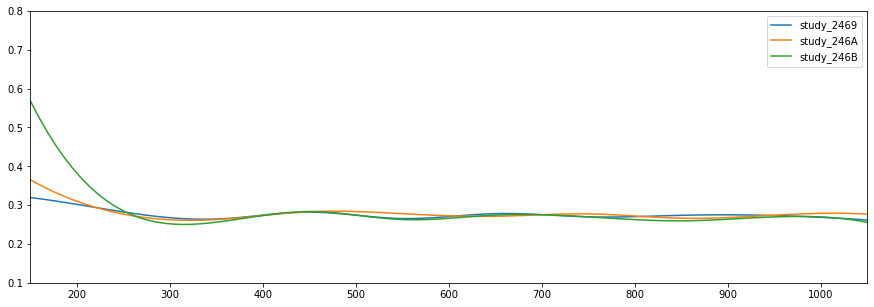

In [151]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo5.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo5.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.show()

#### Using Parameter's of study_246A optimized model

In [163]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

i = studies.loc[studies.iloc[:,0] == 'study_246A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = count
    
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [164]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_2469", "1": "study_246A", "2": "study_246B"})

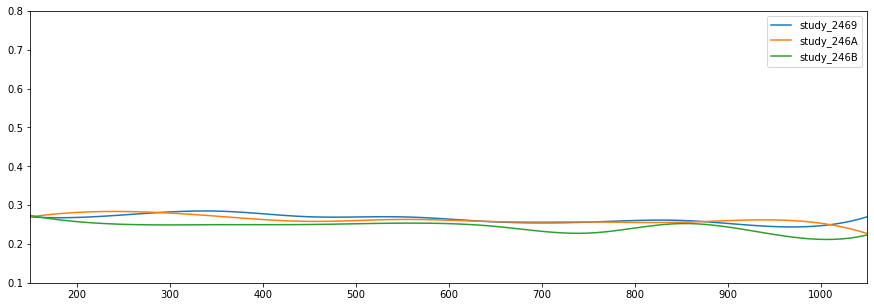

In [165]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo6.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo6.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.show()

#### Using Parameter's of study_246B optimized model

In [155]:
np.random.seed(0)
K = 0
L = 1
N = 300
v = (np.random.uniform(-1,1, testsize)).reshape(-1,1)
sv = 0
outAlg = 1  
isBias = True
isClassification = False
washout = 100

inc = 100
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((11,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,1))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    dfb = studies.iloc[i,2].params['dfb']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    washout = 1000
    for j in range(0,11):#This is for increasing neurons for a particular model instantiation
        startState = np.zeros((1,N))
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = None, teacher=trainin, washout=washout) #zero start state is default

            predicted = model.run(input_u=None, time=testin.shape[0])
            transformed = np.arctan(predicted) + 1

            rmse0, mae0, r20 = getScores(testin, transformed)
            scores[k,0] = rmse0
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores)
        standard_deviation = np.std(scores)
        distance_from_mean = abs(scores - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = scores[not_outlier]

        #average scores together
        nrmse0 = np.mean(no_outliers)
        y[j,0] = nrmse0
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    count = count + 1

In [157]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_2469", "1": "study_246A", "2": "study_246B"})

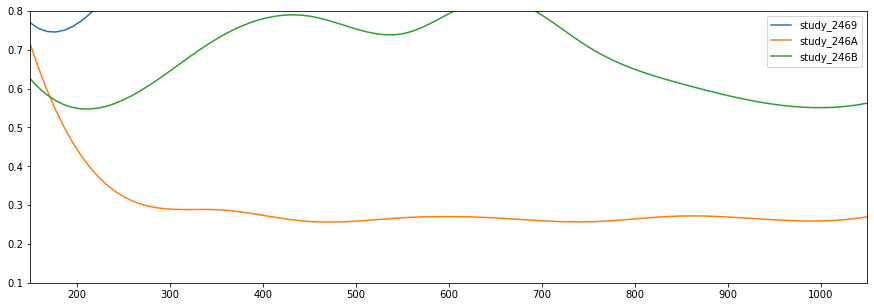

In [158]:
#add to plot
plt.figure(figsize=(15, 5))
for col in range(0,plotInfo7.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo7.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7.columns[col])

plt.legend()
plt.xlim([150,1050])
plt.ylim([0.1,0.8])
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

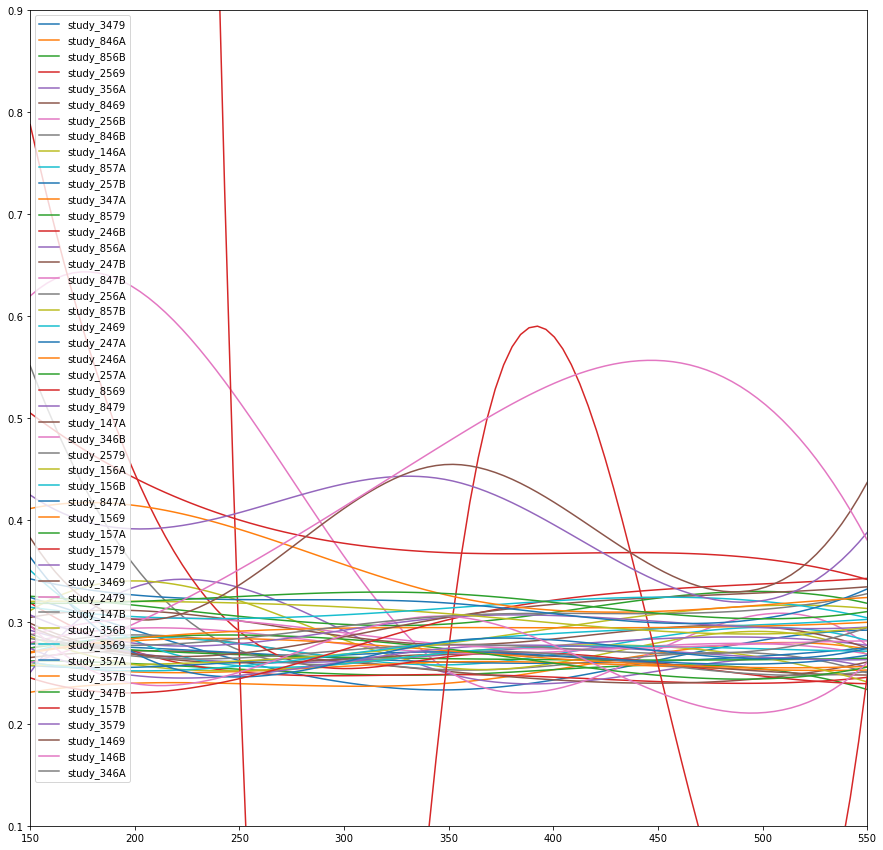

In [118]:
#add to plot
x = np.arange(50,551,inc) #Number of Neurons
plt.figure(figsize=(15, 15))
for col in range(0,plotInfo3.shape[1]):
    X_Y_Spline = make_interp_spline(x[1:], plotInfo3.iloc[1:,col])
    X_ = np.linspace(x[1:].min(), x[1:].max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo3.columns[col])

plt.legend()
plt.xlim([150,550])
plt.ylim([0.1,0.9])
plt.show()

All models, except study_346A, eventually settle on a more reasonable score. Interestingly, Models with self-recurent connections seem to do the best with a large enough reservoir. However, it seems with a smaller reservoir of 50 neurons, they are unstable; there are not enough neurons to process the information. Other models, like those from study_146B and study_1579, perform well with smaller reservoirs. The larger reservoirs do not improve the model enough to make it a valuable trade-off.